# Gaussian Target Practice

In [1]:
] activate "../"

  Activating project at `~/PhD/MicroCanonicalHMC.jl`


In [2]:
using Distributions
using ForwardDiff
using LinearAlgebra
using Random

using PyPlot
using Distributed

using Revise
using MicroCanonicalHMC

[ Info: Precompiling MicroCanonicalHMC [234d2aa0-2291-45f7-9047-6fa6f316b0a8]


## MCHMC

In [3]:
d = 20
k = 1
m = Vector(LinRange(1, 100, d))
e = 10 .^ LinRange(log10(1/sqrt(k)), log10(sqrt(k)), d)
cov_matt = Diagonal(e);

In [4]:
target = GaussianTarget(m, cov_matt);

In [5]:
spl = MCHMC(50_000, 0.01; gamma=(50-1)/(50+1), init_eps=sqrt(d)) #, sigma=ones(d));
@time samples_mchmc = Sample(spl, target, 100_000; dialog=true);

[ Info: Tuning sigma ⏳
[ Info: Tuning eps ⏳
[ Info: Tuning L ⏳
MCHMC (tuning):   0%|                                   |  ETA: 3:41:47

Burn in step: 10000
eps --->4.971013905203149


MCHMC (tuning):  20%|███████                            |  ETA: 0:00:13

L   --->100.74560755075034
 


MCHMC (tuning):  40%|██████████████                     |  ETA: 0:00:15

Burn in step: 20000
eps --->0.1338888656956581
L   --->2.2246508402510368
 


MCHMC (tuning):  60%|█████████████████████              |  ETA: 0:00:12

Burn in step: 30000
eps --->0.1700831981531857
L   --->2.3813699850573795
 


MCHMC (tuning):  80%|████████████████████████████       |  ETA: 0:00:07

Burn in step: 40000
eps --->0.20995497169149338
L   --->2.5855003017583638
 


2mMCHMC (tuning): 100%|███████████████████████████████████| Time: 0:00:38

Burn in step: 50000
eps --->0.22727974607007365
L   --->2.527011271161798
 


[ Info: eps: 0.22727974607007365
[ Info: L: 2.527011271161798
[ Info: nu: 0.0980338601234401
[ Info: sigma: [0.8496790038262494, 1.4843277925349054, 2.0302735976644186, 3.466185586069603, 3.751793639768605, 5.253327969999329, 6.009994006691396, 7.187274392250751, 8.169000716492466, 9.118407172394912, 9.78617832238568, 10.658811969633174, 11.39161128903788, 13.069043748758952, 14.19516377465406, 14.860413168406467, 17.156681859889364, 16.40473015918129, 17.646819049499566, 19.153948699899008]
[ Info: adaptive: false
2mMCHMC: 100%|████████████████████████████████████████████| Time: 0:00:01

 44.521503 seconds (35.34 M allocations: 196.064 GiB, 12.31% gc time, 10.45% compilation time: 2% of which was recompilation)


In [6]:
_samples_mchmc = mapreduce(permutedims, vcat, samples_mchmc[10_000:end])
stds = std(_samples_mchmc, dims=1)[1:end-3]
means = mean(_samples_mchmc, dims=1)[1:end-3]
E = [sample[end-1] for sample in samples_mchmc][10_000:end];
eps = [sample[end-2] for sample in samples_mchmc]#[10_000:end]
VarE = mean(E.^2)/d

0.0027440802190633056

In [7]:
ESSs, rhat = Summarize(samples_mchmc[10_000:end])
ESS = mean(ESSs)

27683.80912944246

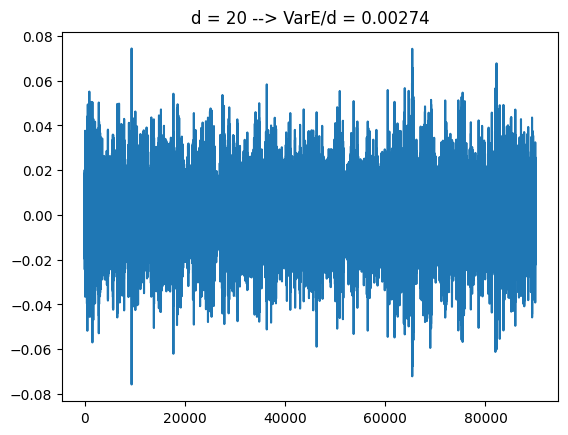

PyObject Text(0.5, 1.0, 'd = 20 --> VarE/d = 0.00274')

In [8]:
plt.plot(E/d, label="E/d")
plt.title(string("d = ", d, " --> VarE/d = ", round(VarE, digits=5)))

In [9]:
spl = MCHMC(50_000, 0.01; init_eps=sqrt(d), adaptive=true) #, sigma=ones(d))
@time samples_mchmc_adaptive = Sample(spl, target, 100_000; dialog=true);

[ Info: Tuning sigma ⏳
[ Info: Tuning eps ⏳
[ Info: Tuning L ⏳
MCHMC (tuning):  20%|██████▉                            |  ETA: 0:00:03

Burn in step: 10000
eps --->4.9280331487202576
L   --->100.19177001874938
 


MCHMC (tuning):  40%|██████████████                     |  ETA: 0:00:05

Burn in step: 20000
eps --->0.19546606691386684
L   --->3.2284298677887024
 


MCHMC (tuning):  60%|████████████████████▉              |  ETA: 0:00:04

Burn in step: 30000
eps --->0.18160848719489922
L   --->2.535888958793746
 


MCHMC (tuning):  80%|███████████████████████████▉       |  ETA: 0:00:03

Burn in step: 40000
eps --->0.2403934445237395
L   --->2.9567896127821958
 


2mMCHMC (tuning): 100%|███████████████████████████████████| Time: 0:00:17

Burn in step: 50000
eps --->0.2865732631809423
L   --->3.185163240710987
 


[ Info: eps: 0.2865732631809423
[ Info: L: 3.185163240710987
[ Info: nu: 0.10341736793837773
[ Info: sigma: [0.9314619229376104, 1.5038743781629027, 2.023379599985159, 3.3820665620272585, 4.362768549570988, 5.115005019456083, 6.153000276368565, 7.012631388729563, 7.8939852563453625, 9.097701509576792, 9.972814088312814, 10.809869562669764, 12.105269106496547, 12.763136253415261, 14.11571113741162, 14.543671995460038, 17.06997487677742, 17.332796568012373, 17.421671727603886, 18.51733084865029]
[ Info: adaptive: true
2mMCHMC: 100%|████████████████████████████████████████████| Time: 0:00:01

 19.945310 seconds (25.12 M allocations: 195.277 GiB, 18.80% gc time)


In [10]:
_samples_mchmc_adaptive = mapreduce(permutedims, vcat, samples_mchmc_adaptive[10_000:end])
stds_adaptive = std(_samples_mchmc_adaptive, dims=1)[1:end-3]
means_adaptive = mean(_samples_mchmc_adaptive, dims=1)[1:end-3]
E_adaptive = [sample[end-1] for sample in samples_mchmc_adaptive]#[10_000:end];
eps_adaptive = [sample[end-2] for sample in samples_mchmc_adaptive]#[10_000:end]
VarE_adaptive = mean(E_adaptive.^2)/d

0.01010312729612353

In [11]:
ESSs, rhat = Summarize(samples_mchmc_adaptive[10_000:end])
ESS = mean(ESSs)

33342.711570936124

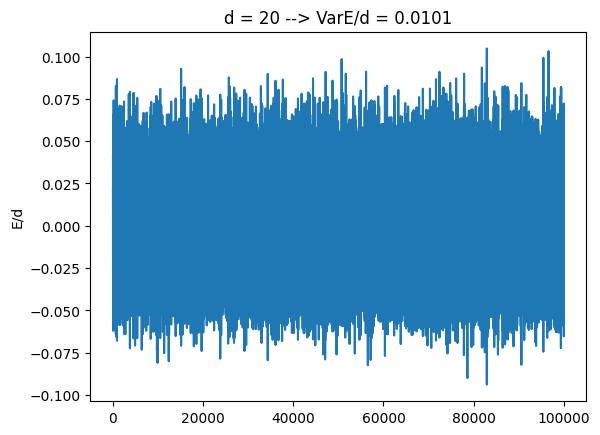

PyObject Text(0.5, 1.0, 'd = 20 --> VarE/d = 0.0101')

In [12]:
plt.plot(E_adaptive/d, label="E/d")
plt.ylabel("E/d")
plt.title(string("d = ", d, " --> VarE/d = ", round(VarE_adaptive, digits=5)))

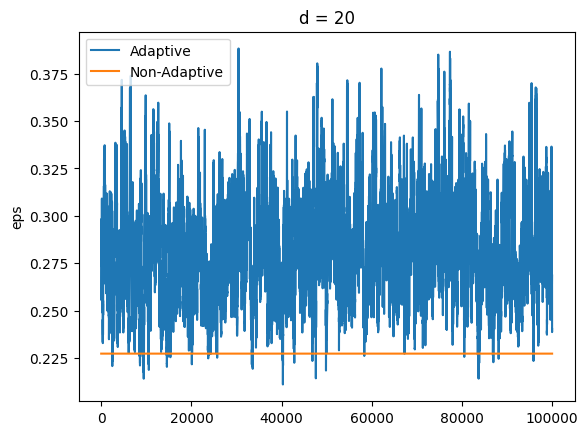

PyObject Text(0.5, 1.0, 'd = 20')

In [13]:
plt.plot(eps_adaptive, label="Adaptive")
plt.plot(eps, label="Non-Adaptive")
plt.ylabel("eps")
plt.legend()
plt.title(string("d = ", d))

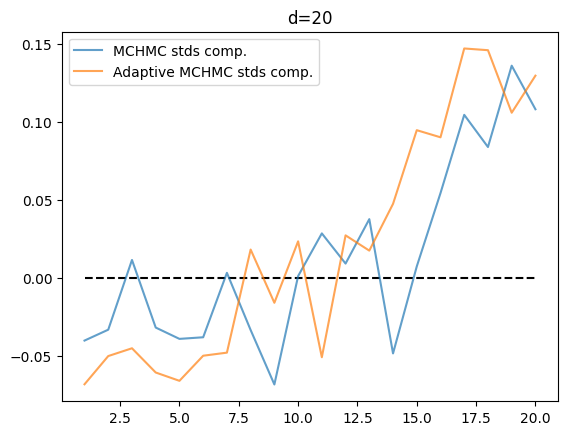

In [14]:
plt.plot(Vector(1:d), zeros(d), "k--")
plt.plot(Vector(1:d), stds./sqrt.(e) .- 1, label="MCHMC stds comp.", alpha=0.7)
plt.plot(Vector(1:d), stds_adaptive./sqrt.(e) .- 1, label="Adaptive MCHMC stds comp.", alpha=0.7)
plt.legend()
plt.title(string("d=", d));

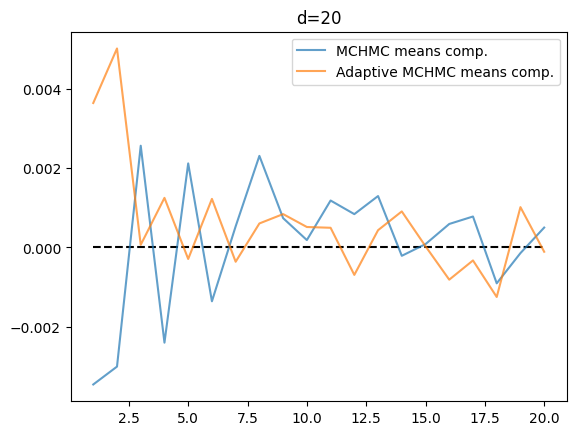

In [15]:
plt.plot(Vector(1:d), zeros(d), "k--")
plt.plot(Vector(1:d), (means .- m)./sqrt.(e), label="MCHMC means comp.", alpha=0.7)
plt.plot(Vector(1:d), (means_adaptive .- m)./sqrt.(e), label="Adaptive MCHMC means comp.", alpha=0.7)
plt.legend()
plt.title(string("d=", d));

## NUTS

In [16]:
using AdvancedHMC
using LogDensityProblems

In [17]:
# Define the target distribution using the `LogDensityProblem` interface
struct LogTargetDensity
    dim::Int
end
LogDensityProblems.logdensity(p::LogTargetDensity, θ) = -target.nlogp(θ) #-sum(abs2, θ) / 2  # standard multivariate normal
LogDensityProblems.dimension(p::LogTargetDensity) = p.dim
LogDensityProblems.capabilities(::Type{LogTargetDensity}) = LogDensityProblems.LogDensityOrder{0}()

In [18]:
# Choose parameter dimensionality and initial parameter value
initial_θ = target.prior_draw()
ℓπ = LogTargetDensity(d)

# Set the number of samples to draw and warmup iterations
n_samples, n_adapts = 50_000, 10_000

# Define a Hamiltonian system
metric = DiagEuclideanMetric(d)
hamiltonian = Hamiltonian(metric, ℓπ, ForwardDiff)

# Define a leapfrog solver, with initial step size chosen heuristically
initial_ϵ = find_good_stepsize(hamiltonian, initial_θ)
integrator = AdvancedHMC.Leapfrog(initial_ϵ)

# Define an HMC sampler, with the following components
#   - multinomial sampling scheme,
#   - generalised No-U-Turn criteria, and
#   - windowed adaption for step-size and diagonal mass matrix
proposal = NUTS{MultinomialTS, GeneralisedNoUTurn}(integrator)
adaptor = StanHMCAdaptor(MassMatrixAdaptor(metric), StepSizeAdaptor(0.8, integrator))

# Run the sampler to draw samples from the specified Gaussian, where
#   - `samples` will store the samples
#   - `stats` will store diagnostic statistics for each sample
samples_hmc, stats = sample(hamiltonian, proposal, initial_θ, n_samples, adaptor, n_adapts; progress=true);

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter ~/.julia/packages/ProgressMeter/sN2xr/src/ProgressMeter.jl:618
Sampling 100%|███████████████████████████████| Time: 0:00:05
  iterations:                    50000
  n_steps:                       7
  is_accept:                     true
  acceptance_rate:               0.8652114113163368
  log_density:                   -24.409127628405333
  hamiltonian_energy:            33.96783911726816
  hamiltonian_energy_error:      -0.15167504834803935
  max_hamiltonian_energy_error:  0.2848826254350385
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.6252299950457728
  nom_step_size:                 0.62522999

In [19]:
_samples_hmc = mapreduce(permutedims, vcat, samples_hmc)
stds_hmc = vec(std(_samples_hmc, dims=1))
means_hmc = vec(mean(_samples_hmc, dims=1));

In [20]:
ESSs, rhat = Summarize(samples_hmc)
ESS = mean(ESSs)

64523.97202724604

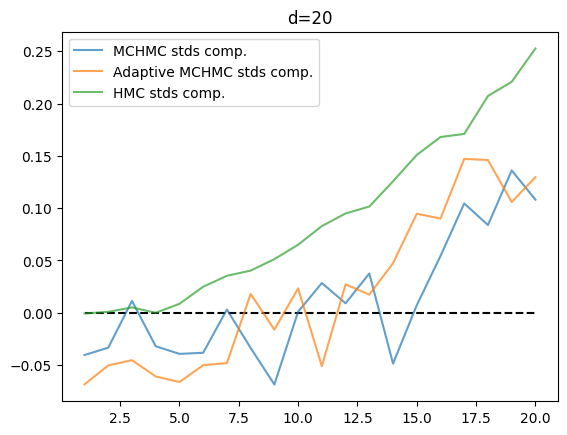

In [21]:
plt.plot(Vector(1:d), zeros(d), "k--")
plt.plot(Vector(1:d), stds./sqrt.(e) .- 1, label="MCHMC stds comp.", alpha=0.7)
plt.plot(Vector(1:d), stds_adaptive./sqrt.(e) .- 1, label="Adaptive MCHMC stds comp.", alpha=0.7)
plt.plot(Vector(1:d), stds_hmc./sqrt.(e) .- 1, label="HMC stds comp.", alpha=0.7)
plt.legend()
plt.title(string("d=", d));

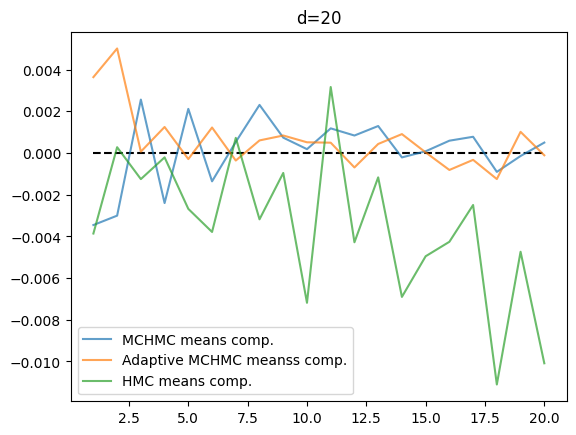

In [22]:
plt.plot(Vector(1:d), zeros(d), "k--")
plt.plot(Vector(1:d), (means .- m) ./ sqrt.(e), label="MCHMC means comp.", alpha=0.7)
plt.plot(Vector(1:d), (means_adaptive.- m) ./ sqrt.(e), label="Adaptive MCHMC meanss comp.", alpha=0.7)
plt.plot(Vector(1:d), (means_hmc.- m) ./ sqrt.(e), label="HMC means comp.", alpha=0.7)
plt.legend()
plt.title(string("d=", d));